In [21]:
from abc import ABC, abstractmethod
import itertools as itt
import os
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
alg_sels = ['WGCNA', 'CEMI', 'ARACNE']
ct_sels = ['KIRC', 'LUSC', 'KIRP']
conf_sels = ['sex']
blocks = ['female', 'male']
fro = 0
to = 20
cwd = os.getcwd()

In [34]:
JI = pd.DataFrame(columns = ['confounder/\nvariable', 'cohort', 'method', 'block type', 'partID', 'k', 'mean JI'])
for alg_sel in alg_sels:
    for conf_sel in conf_sels:
        for ct_sel in ct_sels:
            for block in blocks:
                path = os.path.join(cwd, 'mean_JI_G_all_comparisons')
                for i in range(fro, to):
                    filename = f'g_all_conf_{i}_{str(alg_sel)}_{str(conf_sel)}_{str(ct_sel)}_{block}_jaccInd.csv'
                    try:
                        df_conf = pd.read_csv(os.path.join(path, filename), sep=',', header=0)
                        df_conf['partID'] = i
                        df_conf['block type'] = f'confounder-based {block}'
                        df_conf['method'] = alg_sel
                        df_conf['cohort'] = ct_sel
                        df_conf['confounder/\nvariable'] = conf_sel
                    except:
                        continue
                    filename = f'g_all_rnd_{i}_{str(alg_sel)}_{str(conf_sel)}_{str(ct_sel)}_{block}_jaccInd.csv'
                    try:
                        df_rnd = pd.read_csv(os.path.join(path, filename), sep=',', header=0)
                        df_rnd['partID'] = i
                        df_rnd['block type'] = f'random {block}'
                        df_rnd['method'] = alg_sel
                        df_rnd['cohort'] = ct_sel
                        df_rnd['confounder/\nvariable'] = conf_sel
                    except:
                        continue
                    JI = pd.concat([JI, df_conf, df_rnd])
print(JI.head())

  confounder/\nvariable cohort method               block type partID    k  \
0                   sex   KIRC  WGCNA  confounder-based female      0   10   
1                   sex   KIRC  WGCNA  confounder-based female      0   60   
2                   sex   KIRC  WGCNA  confounder-based female      0  110   
3                   sex   KIRC  WGCNA  confounder-based female      0  160   
4                   sex   KIRC  WGCNA  confounder-based female      0  210   

    mean JI  size intersection  size union      state  
0  0.250000                4.0        16.0  filled01_  
1  0.411765               35.0        85.0  filled01_  
2  0.349693               57.0       163.0  filled01_  
3  0.344538               82.0       238.0  filled01_  
4  0.372549              114.0       306.0  filled01_  


<Figure size 432x288 with 0 Axes>

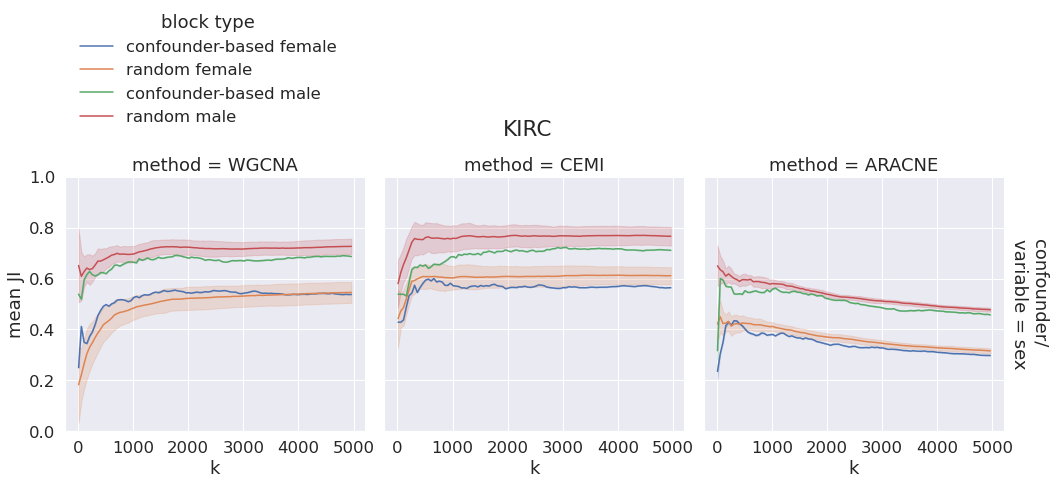

<Figure size 432x288 with 0 Axes>

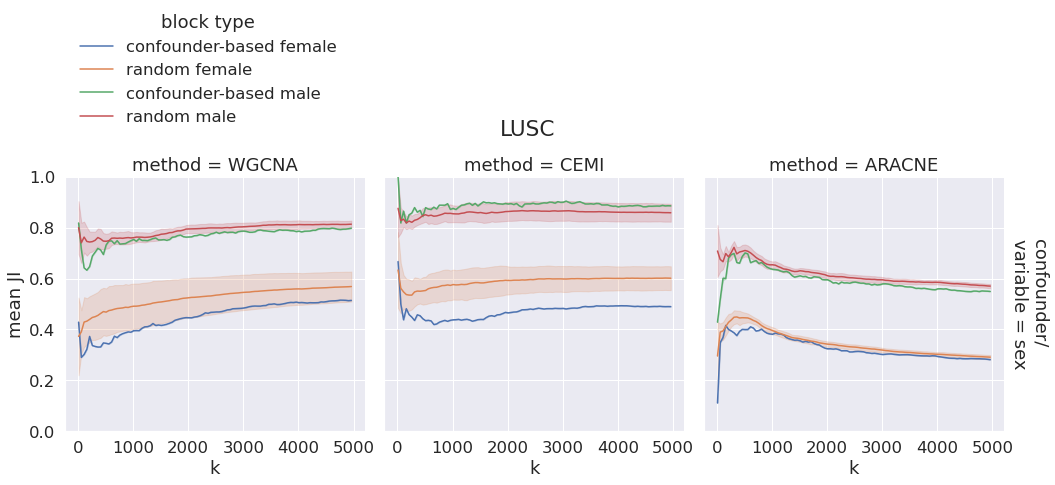

<Figure size 432x288 with 0 Axes>

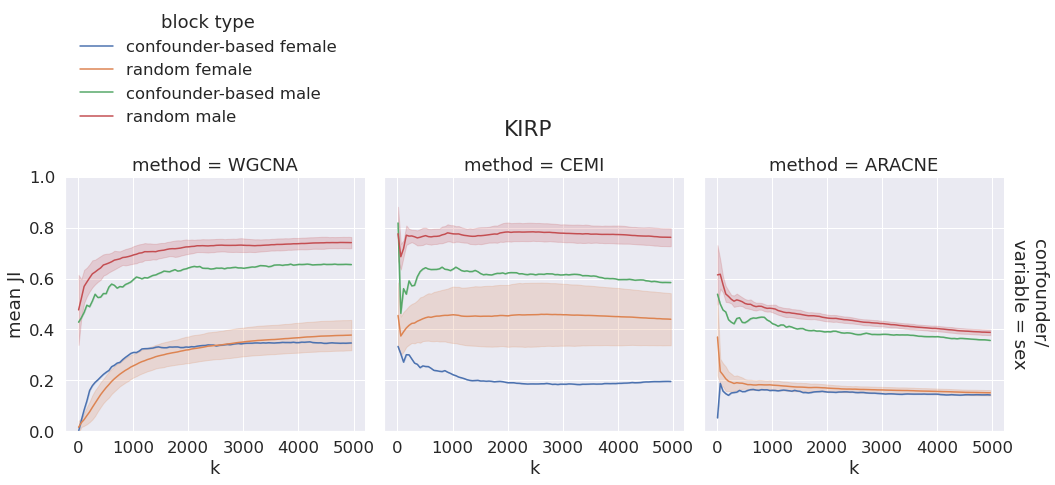

In [35]:
for ct_sel in ct_sels:
    JI_ = JI[JI['cohort'] == ct_sel]
    plt.figure()
    sns.set(font_scale=1.5)
    sns.set_style('darkgrid')
    g = sns.FacetGrid(JI_, row='confounder/\nvariable', col='method', hue='block type', margin_titles=True, ylim=(0,1), legend_out=False, height=5)
    ax = g.axes[0,0]
    g.map(sns.lineplot, "k", "mean JI",errorbar='sd').add_legend()
    sns.move_legend(ax, "upper left", frameon=False, bbox_to_anchor=(0.0, 1.7))
    g.fig.suptitle(ct_sel, y=1.05)
